## ToMe Visualization
We provide some visualization functions to visualize the effect of ToMe like in our paper.

In [1]:
from vim.models_mamba import vim_small_patch16_stride8_224_bimambav2_final_pool_mean_abs_pos_embed_with_midclstok_div2
from tome.patch.mamba import apply_patch
import torch
import tome
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
import torch.nn.functional as F
from timm.models import create_model

/home/albert/miniconda3/envs/vimAndMamba/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda")
nb_classes = 1000
input_size=224
model = "vim_small_patch16_stride8_224_bimambav2_final_pool_mean_abs_pos_embed_with_midclstok_div2"
r = 1

In [3]:
# We use the timm augreg models here, but you can use any supported implementation.


model = create_model(
        model,
        pretrained=False,
        num_classes=nb_classes,
        drop_rate=0.0,
        drop_path_rate=None,
        drop_block_rate=None,
        img_size=input_size
    )

model.to(device)

checkpoint_path = "/home/albert/ml/Mambas/vim/Vim/vim/ckpt/vim_s_midclstok_ft_81p6acc.pth"
checkpoint = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint["model"])
# Source tracing is necessary for visualization!
apply_patch(model, trace_source=True)


In [4]:
# input_size = 224

# # Make sure the transform is correct for your model!
# transform_list = [
#     transforms.Resize(int((256 / 224) * input_size), interpolation=InterpolationMode.BICUBIC),
#     transforms.CenterCrop(input_size)
# ]

# # The visualization and model need different transforms
# transform_vis  = transforms.Compose(transform_list)
# transform_norm = transforms.Compose(transform_list + [
#     transforms.ToTensor(),
#     transforms.Normalize(model.default_cfg["mean"], model.default_cfg["std"]),
# ])

In [5]:
img_original = Image.open("/home/albert/ml/Mambas/ImageNet1k/ILSVRC/Data/CLS-LOC/train/n01484850/n01484850_10086.JPEG")



from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
eval_crop_ratio = 0.875


transforms_all = []
transforms_vis = []
resize_im = True
for t in [transforms_all, transforms_vis]:
    if resize_im:
        size = int(input_size / eval_crop_ratio)
        t.append(
            transforms.Resize(size, interpolation=3),  # to maintain same ratio w.r.t. 224 images
        )
        t.append(transforms.CenterCrop(input_size))

transforms_all.append(transforms.ToTensor())
transforms_all.append(transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD))

pil_transforms = transforms.Compose(transforms_vis)
all_transforms = transforms.Compose(transforms_all)

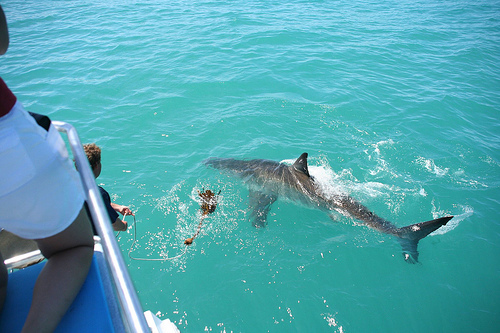

In [6]:
img_original

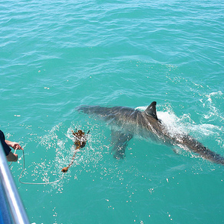

In [7]:
img_pil_transforms = pil_transforms(img_original)
img_pil_transforms

## Visualize one image
You can play with the `r` value to get different numbers of tokens at the end of the network.

x size before embed: torch.Size([1, 3, 224, 224])
PE: params : img_size (224, 224) patch_size (16, 16) embed_dim 384 stride 8
PE: x init : torch.Size([1, 3, 224, 224])
PE: x after  proj/Conv2D : torch.Size([1, 384, 27, 27])
PE: x after  flatten : torch.Size([1, 729, 384])
PE: x after  norm : torch.Size([1, 729, 384])
x size after embed: torch.Size([1, 729, 384])
x size after cls token added : torch.Size([1, 730, 384])
x size after pos embedd : torch.Size([1, 730, 384])
x size after pos_drop : torch.Size([1, 730, 384])
x size: torch.Size([1, 730, 768])
Init source size: torch.Size([1, 730, 730])
New source size: torch.Size([1, 729, 730])
x size: torch.Size([1, 729, 768])
New source size: torch.Size([1, 728, 730])
x size: torch.Size([1, 728, 768])
New source size: torch.Size([1, 727, 730])
x size: torch.Size([1, 727, 768])
New source size: torch.Size([1, 726, 730])
x size: torch.Size([1, 726, 768])
New source size: torch.Size([1, 725, 730])
x size: torch.Size([1, 725, 768])
New source si

/home/albert/ml/Mambas/ToMe/ToMe/tome/vis.py:206: RuntimeWarning: invalid value encountered in divide
  color = (mask * img).sum(axis=(0, 1)) / mask.sum()


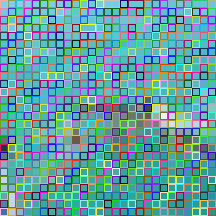

In [8]:
img_tensor = all_transforms(img_original)
img_batch = img_tensor[None, :,:,:] # F.interpolate(img_tensor[None, :,:,:], 224)
# print(img_batch.size())
img_batch =img_batch.to(device)
# print(img_batch.size())

_ = model(img_batch)
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization_mamba(img_pil_transforms, source, class_token=True,token_per_dim =27)

Image shape: (216, 216, 3)
ph: 27, pw: 27
Source shape before class token removal: torch.Size([1, 706, 730])
Source shape after class token removal: torch.Size([1, 706, 729])
sum_of_original_tokens_per_new_token: torch.Size([1, 706])
sum_of_merged_tokens: tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.

/home/albert/ml/Mambas/ToMe/ToMe/tome/vis.py:309: RuntimeWarning: invalid value encountered in divide
  color = (mask * img).sum(axis=(0, 1)) / mask.sum()


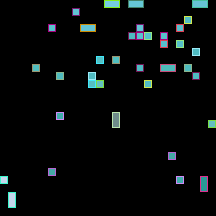

In [9]:
tome.make_visualization_mamba_only_merged_tokens(img_pil_transforms, source, class_token=True,token_per_dim =27)


## Visualize intermediate results
Setting `r` to be a list can let us control where we stop merging.

x size before embed: torch.Size([1, 3, 224, 224])
PE: params : img_size (224, 224) patch_size (16, 16) embed_dim 384 stride 8
PE: x init : torch.Size([1, 3, 224, 224])
PE: x after  proj/Conv2D : torch.Size([1, 384, 27, 27])
PE: x after  flatten : torch.Size([1, 729, 384])
PE: x after  norm : torch.Size([1, 729, 384])
x size after embed: torch.Size([1, 729, 384])
x size after cls token added : torch.Size([1, 730, 384])
x size after pos embedd : torch.Size([1, 730, 384])
x size after pos_drop : torch.Size([1, 730, 384])
x size: torch.Size([1, 730, 768])
Init source size: torch.Size([1, 730, 730])
New source size: torch.Size([1, 705, 730])
x size: torch.Size([1, 705, 768])
New source size: torch.Size([1, 680, 730])
x size: torch.Size([1, 680, 768])
New source size: torch.Size([1, 655, 730])
x size: torch.Size([1, 655, 768])
New source size: torch.Size([1, 630, 730])
x size: torch.Size([1, 630, 768])
New source size: torch.Size([1, 605, 730])
x size: torch.Size([1, 605, 768])
New source si

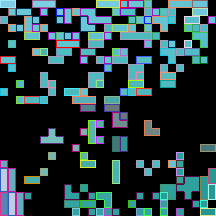

In [10]:
model.r = [25] * 8  # 8 / 24 layers
_ = model(img_batch)
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization_mamba_only_merged_tokens(img_pil_transforms, source, class_token=True,token_per_dim =27)

In [11]:
model.r = [25] * 16  # 16 / 24 layers
_ = model(img[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img, source, patch_size=16, class_token=True)

NameError: name 'img' is not defined

In [ ]:
model.r = [25] * 22  # 22 / 24 layers
_ = model(img[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img, source, patch_size=16, class_token=True)